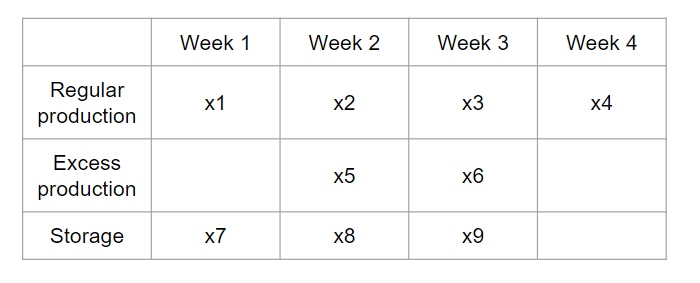

Min Z=10x1​ + 10x2​ + 15x3​ + 15x4​ + 15x5​ + 20x6 ​+ 3x7​ + 3x8 ​+ 3x9​

s.t.  
x1 ​− x7 ​= 300  
x2​ + x7​ − x8​ + x5 ​= 700  
x3​ + x8 ​− x9​ + x6 ​= 900  
x4​ + x9 ​= 800  
x1​ ≤ 700  
x2​ ≤ 700  
x3 ≤ 700  
x4​ ≤ 700  
x5​ ≤ 200  
x6​ ≤ 200  

x1​,x2​,x3​,x4​,x5​,x6​,x7​,x8​,x9​≥0  




Make inital table
x1 x2 x3 x4 x5 x6 x7 x8 x9 s1 s2 s3 s4 s5 s6 a1 a2 a3 a4 b  
a1, a2, a3, a4 are artifical variables for first four equalities  
s1, s2, s3, s4, s5, s6 are slack variables for next 6 inequalties  
new objective function , z = a1 + a2 + a3 + a4 (phase 1)

In [59]:
import numpy as np
np.set_printoptions(linewidth=200, suppress=True)
table = [
    [1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 300],  # Constraint 1: x1 - x7 + a1 = 300
    [0, 1, 0, 0, 1, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 700],  # Constraint 2: x2 + x7 - x8 + x5 + a2 = 700
    [0, 0, 1, 0, 0, 1, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 900],  # Constraint 3: x3 + x8 - x9 + x6 + a3 = 900
    [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 800],  # Constraint 4: x4 + x9 + a4 = 800
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 700],  # Constraint 5: x1 + s1 = 700
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 700],  # Constraint 6: x2 + s2 = 700
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 700],  # Constraint 7: x3 + s3 = 700
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 700],  # Constraint 8: x4 + s4 = 700
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 200],  # Constraint 9: x5 + s5 = 200
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 200],  # Constraint 10: x6 + s6 = 200
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]   #objective: a1 + a2 + a3 + a4 = z
]
tableau = np.array(table)

In [60]:
num_vars = 19
#changing relative costs to make a1 a2 a3 a4 basic variables
tableau[-1,:] = tableau[-1,:] - tableau[0,:] - tableau[1,:] - tableau[2,:] - tableau[3,:]
print(tableau)

[[    1     0     0     0     0     0    -1     0     0     0     0     0     0     0     0     1     0     0     0   300]
 [    0     1     0     0     1     0     1    -1     0     0     0     0     0     0     0     0     1     0     0   700]
 [    0     0     1     0     0     1     0     1    -1     0     0     0     0     0     0     0     0     1     0   900]
 [    0     0     0     1     0     0     0     0     1     0     0     0     0     0     0     0     0     0     1   800]
 [    1     0     0     0     0     0     0     0     0     1     0     0     0     0     0     0     0     0     0   700]
 [    0     1     0     0     0     0     0     0     0     0     1     0     0     0     0     0     0     0     0   700]
 [    0     0     1     0     0     0     0     0     0     0     0     1     0     0     0     0     0     0     0   700]
 [    0     0     0     1     0     0     0     0     0     0     0     0     1     0     0     0     0     0     0   700]
 [    0     0   

In [61]:
import numpy as np

def simplex_algorithm(tableau, num_vars):

    tableau = np.array(tableau, dtype=float)  # Ensure tableau is a numpy array with float values

    num_rows, num_cols = tableau.shape

    while True:
        # Step 1: Check if optimality is reached (no negative values in the objective function row)
        # The objective function row is the last row of the tableau
        if all(tableau[-1, :-1] >= 0):
            break  # If all values in the last row are >= 0, we are done

        # Step 2: Find entering variable (most negative value in the last row)
        pivot_col = np.argmin(tableau[-1, :-1])  # Column with the most negative coefficient

        # Step 3: Find the leaving variable (minimum positive ratio of RHS to pivot column)
        ratios = []
        for i in range(num_rows - 1):
            if tableau[i, pivot_col] > 0:
                ratios.append(tableau[i, -1] / tableau[i, pivot_col])
            else:
                ratios.append(float('inf'))  # Ignore negative or zero entries

        pivot_row = np.argmin(ratios)  # Row with the minimum positive ratio

        # Step 4: Perform the pivot (normalize pivot row and update other rows)
        pivot_value = tableau[pivot_row, pivot_col]
        tableau[pivot_row, :] /= pivot_value  # Normalize pivot row

        for i in range(num_rows):
            if i != pivot_row:
                row_factor = tableau[i, pivot_col]
                tableau[i, :] -= row_factor * tableau[pivot_row, :]

        # Continue looping until we reach optimality

    # Step 5: Extract the optimal solution
    optimal_values = [0] * num_vars
    for i in range(num_vars):
        # If a column corresponds to a basic variable, it will have exactly one 1 and the rest 0s
        column = tableau[:, i]
        if np.count_nonzero(column[:-1]) == 1 and np.sum(column[:-1]) == 1:
            row_index = np.where(column == 1)[0][0]
            optimal_values[i] = tableau[row_index, -1]

    return tableau, optimal_values

In [62]:
tableau_2, optimal_values = simplex_algorithm(tableau, num_vars)

In [63]:
print(tableau_2)
print(optimal_values)

[[  1.   0.   0.   0.   0.   0.  -1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0. 300.]
 [  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0. 700.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0. 200.]
 [  0.   0.   0.   0.   1.   0.   1.   0.   0.   0.  -1.  -1.  -1.   0.  -1.   0.   1.   1.   1. 100.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   1.   0.   0.   0.   0.   0.  -1.   0.   0.   0. 400.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  -1.  -1.   0.  -1.   0.   0.   1.   1. 100.]
 [  0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0. 700.]
 [  0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0. 700.]
 [  0.   0.   0.   0.   0.   0.  -1.   0.   0.   0.   1.   1.   1.   1.   1.   0.  -1.  -1.  -1. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  -1.   0.  

here last 4 columns shows that 1st phase lp has feasible solution, objective value is 0 and a1 a2 a3 a4 = 0  
x1 x2 x3 x4 x5 x6, x8, x9, s1, s5 forms basis

**PHASE 2**

delete a1 a2 a3 a4 column

In [64]:
tableau_2.shape
tableau_3 = np.delete(tableau_2, np.s_[15:19], axis=1)
print(tableau_3)

[[  1.   0.   0.   0.   0.   0.  -1.   0.   0.   0.   0.   0.   0.   0.   0. 300.]
 [  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0. 700.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1. 200.]
 [  0.   0.   0.   0.   1.   0.   1.   0.   0.   0.  -1.  -1.  -1.   0.  -1. 100.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   1.   0.   0.   0.   0.   0. 400.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  -1.  -1.   0.  -1. 100.]
 [  0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0. 700.]
 [  0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0. 700.]
 [  0.   0.   0.   0.   0.   0.  -1.   0.   0.   0.   1.   1.   1.   1.   1. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  -1.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


replace final row with actual objective function

In [65]:
tableau_3[-1,:] = [10, 10, 15, 15, 15, 20, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0]
print(tableau_3)

[[  1.   0.   0.   0.   0.   0.  -1.   0.   0.   0.   0.   0.   0.   0.   0. 300.]
 [  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0. 700.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1. 200.]
 [  0.   0.   0.   0.   1.   0.   1.   0.   0.   0.  -1.  -1.  -1.   0.  -1. 100.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   1.   0.   0.   0.   0.   0. 400.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  -1.  -1.   0.  -1. 100.]
 [  0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0. 700.]
 [  0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0. 700.]
 [  0.   0.   0.   0.   0.   0.  -1.   0.   0.   0.   1.   1.   1.   1.   1. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  -1.   0.   0. 100.]
 [ 10.  10.  15.  15.  15.  20.   3.   3.   3.   0.   0.   0.   0.   0.   0.   0.]]


retain the basis variables

In [66]:
tableau_4 = np.copy(tableau_3)
tableau_4[-1,:]  = tableau_4[-1,:] - 10*tableau_4[0,:] - 10*tableau_4[1,:] - 15*tableau_4[6,:] - 15*tableau_4[7,:]  - 15*tableau_4[3,:] - 20*tableau_4[2,:] - 3*tableau_4[5,:] - 3*tableau_4[9,:]
print(tableau_4)

[[     1.      0.      0.      0.      0.      0.     -1.      0.      0.      0.      0.      0.      0.      0.      0.    300.]
 [     0.      1.      0.      0.      0.      0.      0.      0.      0.      0.      1.      0.      0.      0.      0.    700.]
 [     0.      0.      0.      0.      0.      1.      0.      0.      0.      0.      0.      0.      0.      0.      1.    200.]
 [     0.      0.      0.      0.      1.      0.      1.      0.      0.      0.     -1.     -1.     -1.      0.     -1.    100.]
 [     0.      0.      0.      0.      0.      0.      1.      0.      0.      1.      0.      0.      0.      0.      0.    400.]
 [     0.      0.      0.      0.      0.      0.      0.      1.      0.      0.      0.     -1.     -1.      0.     -1.    100.]
 [     0.      0.      1.      0.      0.      0.      0.      0.      0.      0.      0.      1.      0.      0.      0.    700.]
 [     0.      0.      0.      1.      0.      0.      0.      0.      0.      0.  

In [69]:
num_var_2 = 15 #for phase 2 variables are x1 x2 x3 x4 x5 x6 x7 x8 x9 s1 s2 s3 s4 s5 s6
final_tableau, optimal_values = simplex_algorithm(tableau_4, num_var_2)
print(final_tableau)
print(optimal_values)

[[     1.      0.      0.      0.      1.      1.      0.      0.      0.      0.     -1.     -1.     -1.      0.      0.    600.]
 [     0.      1.      0.      0.      0.      0.      0.      0.      0.      0.      1.      0.      0.      0.      0.    700.]
 [     0.      0.      0.      0.      0.      1.      0.      0.      0.      0.      0.      0.      0.      0.      1.    200.]
 [     0.      0.      0.      0.      1.      1.      1.      0.      0.      0.     -1.     -1.     -1.      0.      0.    300.]
 [     0.      0.      0.      0.     -1.     -1.      0.      0.      0.      1.      1.      1.      1.      0.      0.    100.]
 [     0.      0.      0.      0.      0.      1.      0.      1.      0.      0.      0.     -1.     -1.      0.      0.    300.]
 [     0.      0.      1.      0.      0.      0.      0.      0.      0.      0.      0.      1.      0.      0.      0.    700.]
 [     0.      0.      0.      1.      0.      0.      0.      0.      0.      0.  

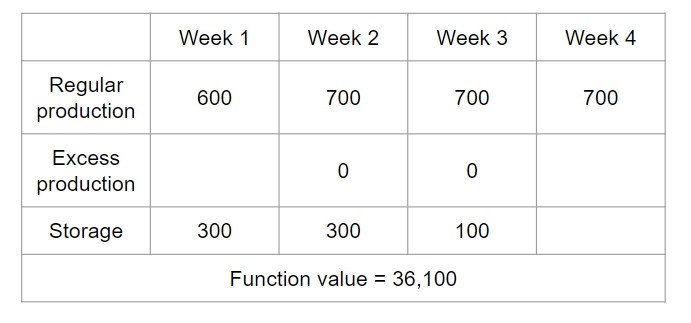